In [ ]:
import sklearn.datasets
import numpy as np

# Loading dataset

In [ ]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [ ]:
X = breast_cancer.data
Y = breast_cancer.target

In [ ]:
print(X)
print(Y)

In [ ]:
print(X.shape, Y.shape)

In [ ]:
import pandas as pd

In [ ]:
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)

In [ ]:
data['class'] = breast_cancer.target

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
print(data['class'].value_counts())

In [ ]:
print(breast_cancer.target_names)

In [ ]:
data.groupby('class').mean()

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop('class', axis=1)
Y = data['class']

In [ ]:
type(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [ ]:
print(Y.shape, Y_train.shape, Y_test.shape)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [ ]:
print(Y.mean(), Y_train.mean(), Y_test.mean())

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y)

In [ ]:
print(X_train.mean(), X_test.mean(), X.mean())

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify = Y, random_state=1)

In [ ]:
print(X_train.mean(), X_test.mean(), X.mean())

# Binarisation of input

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(X_test.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
X_binarised_3_train = X_train['mean area'].map(lambda x: 0 if x < 1000 else 1)

In [ ]:
plt.plot(X_binarised_3_train, '*')

In [ ]:
X_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])

In [ ]:
plt.plot(X_binarised_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
X_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

In [ ]:
type(X_binarised_test)

In [ ]:
X_binarised_test = X_binarised_test.values
X_binarised_train = X_binarised_train.values

In [ ]:
type(X_binarised_test)

# MP neuron model

In [ ]:
from random import randint

In [ ]:
b = 3

i = randint(0, X_binarised_train.shape[0])

print('For row', i)

if (np.sum(X_binarised_train[100, :]) >= b):
  print('MP Neuron inference is malignant')
else:
  print('MP Neuron inference is benign')
  
if (Y_train[i] == 1):
  print('Ground truth is malignant')
else:
  print('Ground truth is benign')

In [ ]:
b = 3

Y_pred_train = []
accurate_rows = 0

for x, y in zip(X_binarised_train, Y_train):
  y_pred = (np.sum(x) >= b)
  Y_pred_train.append(y_pred)
  accurate_rows += (y == y_pred)
  
print(accurate_rows, accurate_rows/X_binarised_train.shape[0])
  

In [ ]:
for b in range(X_binarised_train.shape[1] + 1):
  Y_pred_train = []
  accurate_rows = 0

  for x, y in zip(X_binarised_train, Y_train):
    y_pred = (np.sum(x) >= b)
    Y_pred_train.append(y_pred)
    accurate_rows += (y == y_pred)

  print(b, accurate_rows/X_binarised_train.shape[0])  

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
b = 28

Y_pred_test = []

for x in X_binarised_test:
  y_pred = (np.sum(x) >= b)
  Y_pred_test.append(y_pred)

accuracy = accuracy_score(Y_pred_test, Y_test)

print(b, accuracy)  

# MP Neuron Class

In [44]:
class MPNeuron:
  
  def __init__(self):
    self.b = None
    
  def model(self, x):
    return(sum(x) >= self.b)
  
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
  
  def fit(self, X, Y):
    accuracy = {}
    
    for b in range(X.shape[1] + 1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)
      
    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b
    
    print('Optimal value of b is', best_b)
    print('Highest accuracy is', accuracy[best_b])

In [45]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train, Y_train)

Optimal value of b is 28
Highest accuracy is 0.849609375


In [46]:
Y_test_pred = mp_neuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_test_pred, Y_test)

In [47]:
print(accuracy_test)

0.7894736842105263


# Perceptron Class

In [48]:
X_train = X_train.values
X_test = X_test.values

$y = 1, \mbox{if} \sum_i w_i x_i >= b$

$y =  0, \mbox{otherwise}$

In [49]:
class Perceptron:
  
  def __init__ (self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1, lr = 1):
    
    self.w = np.ones(X.shape[1])
    self.b = 0
    
    accuracy = {}
    max_accuracy = 0
    
    wt_matrix = []
    
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1
          
      wt_matrix.append(self.w)    
          
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
        
    self.w = chkptw
    self.b = chkptb
        
    print(max_accuracy)
    
    plt.plot(accuracy.values())
    plt.ylim([0, 1])
    plt.show()
    
    return np.array(wt_matrix)

In [50]:
perceptron = Perceptron()

0.94921875


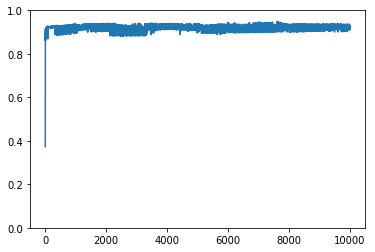

In [51]:
wt_matrix = perceptron.fit(X_train, Y_train, 10000, 0.5)

In [52]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, Y_test))

0.9473684210526315


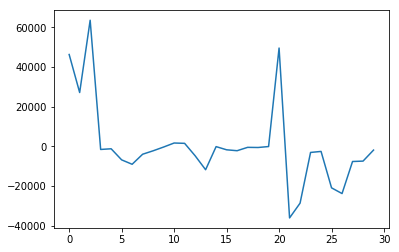

In [53]:
plt.plot(wt_matrix[-1,:])
plt.show()

In [54]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

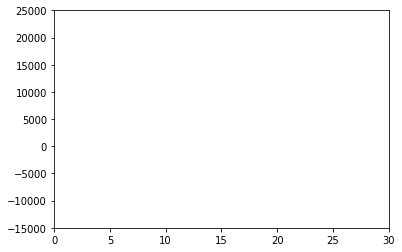

In [55]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-15000, 25000))

line, = ax.plot([], [], lw=2)

In [56]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i, :]
    line.set_data(x, y)
    return (line,)

In [57]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=200, blit=True)

In [58]:
HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available